## Моделирование молекулярной динамики

   - Система: ГЦК решётка $7\times7\times7$ частиц;
   - Постоянная решётки: $a = 1.75~\sigma $;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Начальная температура: $T_i = 10^{-10}~\varepsilon / k_B$;
   - Конечная температура: $T_f = 2.8~\varepsilon / k_B$;
   - Скорость охлаждения: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число шагов для охлаждения: 40000;
   - Функция радиального распределения, среднеквадратичное смещение и коэффициенты самодиффузии рассчитывалась через каждые 5000 шагов;
   - Подсчёт состоял из 2499 шагов: 500 на уравновешивание системы при фиксированной температуре и 1999 на усреднение по ансамблям (к первому ансамблю относятся шаги с 1 по 1000 шаг, ко второму - с 2 по 1001 и т.д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые 1000 шагов;

#### Импорт необходимых библиотек

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

#### Путь к файлам с данными

In [3]:
BASE_DIRECTORY = os.path.dirname(os.getcwd())
PATH_TO_ALL_DATA = os.path.join(BASE_DIRECTORY, 'data')
PATH_TO_ALL_PLOTS = os.path.join(BASE_DIRECTORY, 'plots')
CURRENT_DATA = '2021-04-16'

PATH_TO_CURRENT_DATA = os.path.join(PATH_TO_ALL_DATA, CURRENT_DATA)
PATH_TO_CURRENT_PLOTS = os.path.join(PATH_TO_ALL_PLOTS, CURRENT_DATA)

try:
    os.mkdir(PATH_TO_CURRENT_PLOTS)
except FileExistsError:
    pass

In [4]:
rdf_filename = os.path.join(PATH_TO_CURRENT_DATA, 'rdf_')
transport_filename = os.path.join(PATH_TO_CURRENT_DATA, 'transport_')
parameters_filename = os.path.join(PATH_TO_CURRENT_DATA, 'system_parameters.csv')

In [5]:
plot_filename_postfix = 'heating'

In [6]:
def save_plot(filename):
    plt.savefig(
        os.path.join(PATH_TO_CURRENT_PLOTS, filename)
    )

#### Параметры, при которых была подчитана функция радиального распределения

In [7]:
parameters = (
    (0.99962, -2.18977, 0.02),
    (1.00283, 0.91036, 0.02),
    (1.50566, 2.08292, None),
    (1.51506, 2.06074, None),
)

#### Извлечение значений функции радиального распределения из файлов

In [8]:
rdf_data = pd.DataFrame(columns=['radius'])
msd_data = pd.DataFrame(columns=['time'])
vel_autocor_data = pd.DataFrame(columns=['time'])
einstein_diffusion_data = pd.DataFrame(columns=['time'])
green_kubo_diffusion_data = pd.DataFrame(columns=['time'])

for temperature, pressure, heating_velocity in parameters:
    postfix = ''
    if temperature is not None:
        postfix += f'T_{temperature:.5f}_'
    if pressure is not None:
        postfix += f'P_{pressure:.5f}_'
    if heating_velocity is not None:
        postfix += f'HV_{heating_velocity:.5f}_'
    df = pd.read_csv(
        f'{rdf_filename}{postfix}.csv',
        sep=';',
    )
    rdf_data = rdf_data.merge(
        right=df,
        how='outer',
        on='radius',
    )
    df = pd.read_csv(
        f'{transport_filename}{postfix}.csv',
        sep=';',
    )
    msd_data = msd_data.merge(
        right=df[['time', 'msd']],
        how='outer',
        on='time',
    )
    vel_autocor_data = vel_autocor_data.merge(
        right=df[['time', 'velocity_autocorrelation']],
        how='outer',
        on='time',
    )
    einstein_diffusion_data = einstein_diffusion_data.merge(
        right=df[['time', 'einstein_diffusion']],
        how='outer',
        on='time',
    )
    green_kubo_diffusion_data = green_kubo_diffusion_data.merge(
        right=df[['time', 'green_kubo_diffusion']],
        how='outer',
        on='time',
    )
    rdf_data = rdf_data.rename(columns={'rdf': f'{temperature:.5f}'})
    msd_data = msd_data.rename(columns={'msd': f'{temperature:.5f}'})
    vel_autocor_data = vel_autocor_data.rename(columns={'velocity_autocorrelation': f'{temperature:.5f}'})
    einstein_diffusion_data = einstein_diffusion_data.rename(columns={'einstein_diffusion': f'{temperature:.5f}'})
    green_kubo_diffusion_data = green_kubo_diffusion_data.rename(columns={'green_kubo_diffusion': f'{temperature:.5f}'})

msd_data

,time,0.99962,1.00283,1.50566,1.51506
0,0.005,0.000000,0.000000,0.000000,0.000000
1,0.010,0.000075,0.000075,0.000115,0.000114
2,0.015,0.000300,0.000301,0.000458,0.000457
3,0.020,0.000673,0.000675,0.001027,0.001025
4,0.025,0.001192,0.001196,0.001818,0.001815
...,...,...,...,...,...
1995,9.980,5.278605,5.518834,8.366940,7.926216
1996,9.985,5.281183,5.521654,8.371232,7.930077
1997,9.990,5.283758,5.524479,8.375520,7.933938
1998,9.995,5.286327,5.527305,8.379787,7.937800


#### Графики функций радиального распределения $g(\textbf{r})$ при различных температурах

$$g(\textbf{r})=\dfrac{V}{N^2}\left<\sum_{i}{\sum_{j\ne i}{\delta(\textbf{r}-\textbf{r}_{ij})}}\right>$$

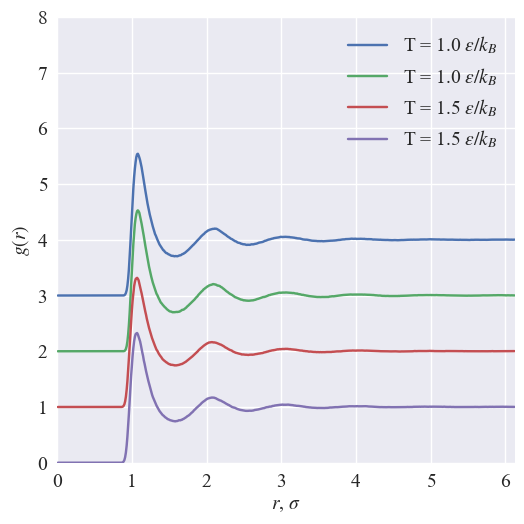

In [9]:
plt.rcParams['font.size'] = 14
for i, tp_tuple in enumerate(parameters):
    plt.plot(
        rdf_data['radius'],
        rdf_data[f'{tp_tuple[0]:.5f}'] + 1 * (len(parameters) - (i + 1)), 
        label=f'T = {tp_tuple[0]:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel('$r$, $\sigma$');
plt.ylabel('$g(r)$');
plt.xlim(
    left=0, 
    right=6.125,
);
plt.ylim(
    bottom=0, 
    top=8,
);
plt.legend();

save_plot(f'rdf_{plot_filename_postfix}.png')

#### Временная зависимость среднеквадратичного смещения $\left<\Delta r^2(t)\right>$ при различных температурах

$$\left<\Delta r^2(t)\right>=\dfrac{1}{N}\sum_{i=1}^{N}{\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2}$$

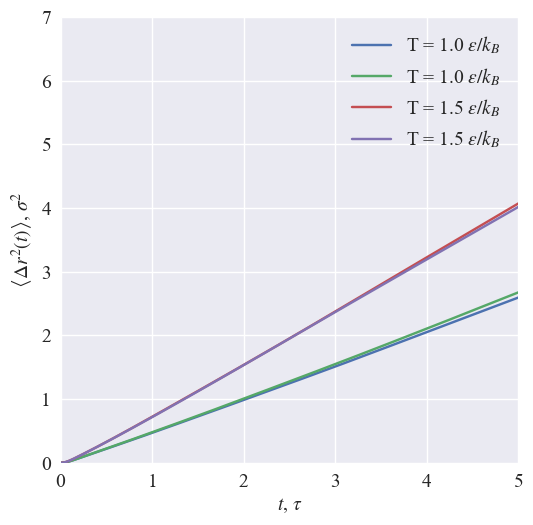

In [10]:
for i, tp_tuple in enumerate(parameters):
    plt.plot(
        msd_data['time'],
        msd_data[f'{tp_tuple[0]:.5f}'], 
        label=f'T = {tp_tuple[0]:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel(r'$t$, $\tau $');
plt.ylabel(r'$\left<\Delta r^2(t)\right>$, $\sigma^2$');
plt.xlim(
    left=0, 
    right=5,
);
plt.ylim(
    bottom=0, 
    top=7,
);
plt.legend();

save_plot(f'msd_{plot_filename_postfix}.png')

#### Временная зависимость автокорреляционнной функции скорости $\Psi(t)$ при различных температурах

$$\Psi(t) = \dfrac{1}{N}\left<\sum_{j=1}^N{\vec{v}_j(t)\vec{v}_j(0)}\right>$$

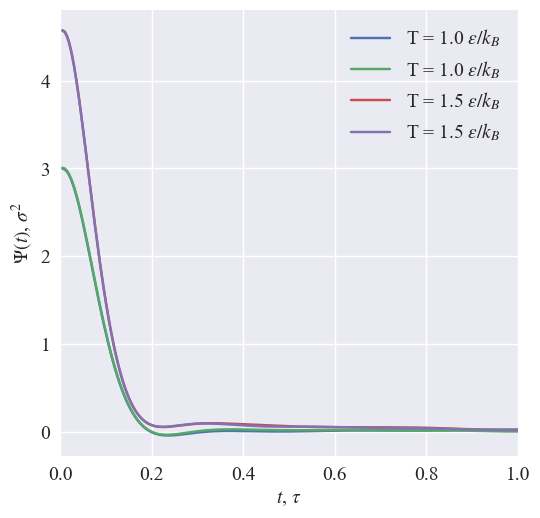

In [11]:
for i, tp_tuple in enumerate(parameters):
    plt.plot(
        vel_autocor_data['time'],
        vel_autocor_data[f'{tp_tuple[0]:.5f}'], 
        label=f'T = {tp_tuple[0]:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel(r'$t$, $\tau $');
plt.ylabel(r'$\Psi(t)$, $\sigma^2$');
plt.xlim(
    left=0, 
    right=1,
);
plt.ylim(
#     bottom=0, 
#     top=20,
);
plt.legend();

save_plot(f'vel_autocorr_{plot_filename_postfix}.png')

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Эйнштейна, при различных температурах

$$D_E(t)=\dfrac{\left<\left<\Delta r^2\right>\right>}{6t}=\dfrac{1}{6tN}\left<\sum_{i=1}^{N}\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2\right>$$

$$D=\lim_{t\rightarrow\infty}{D_E(t)}$$

In [12]:
einstein_diffusion = np.zeros(len(parameters), dtype=np.float)
green_kubo_diffusion = np.zeros(len(parameters), dtype=np.float)

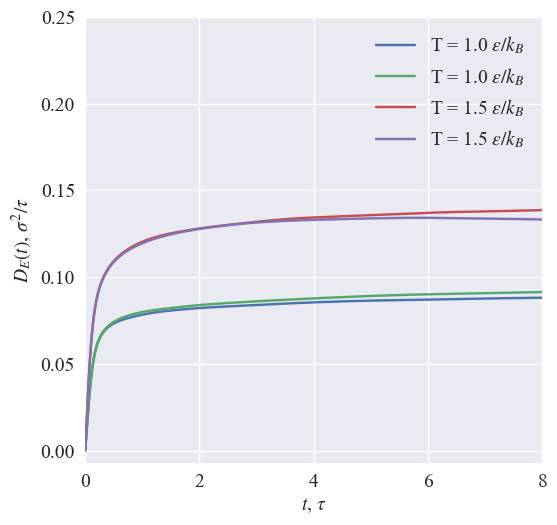

In [13]:
for i, tp_tuple in enumerate(parameters):
    diff_data = einstein_diffusion_data[f'{tp_tuple[0]:.5f}'].values
    plt.plot(
        einstein_diffusion_data['time'].values,
        diff_data, 
        label=f'T = {tp_tuple[0]:.1f} $\epsilon / k_B$',
    );
    einstein_diffusion[i] = diff_data[-1]
    
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'$D_E(t)$, $\sigma^2 / \tau$');
plt.xlim(
    left=0, 
    right=8,
);
plt.ylim(
#     bottom=0, 
    top=0.25,
);
plt.legend();

save_plot(f'diffusion_einstein_{plot_filename_postfix}.png')

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Грина-Кубо, при различных температурах

$$D_{GK}(t)=\dfrac{1}{3}\int_{0}^{t}{\Psi(\tau)d\tau}=\dfrac{1}{3N}\int_{0}^{t}{\left<\sum_{j=1}^N{\vec{v}_j(\tau)\vec{v}_j(0)}\right>d\tau}$$

$$D=\lim_{t\rightarrow\infty}{D_{GK}(t)}$$

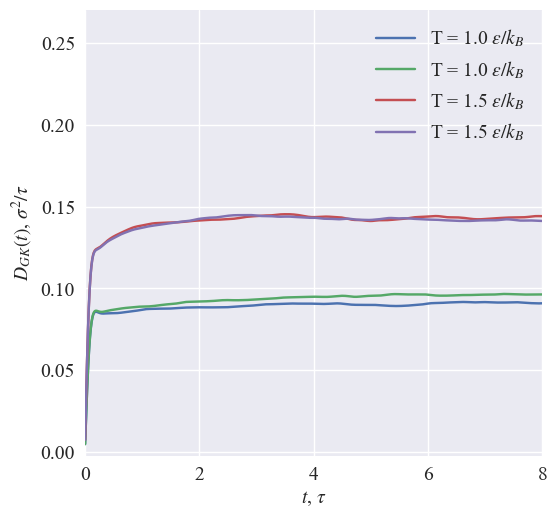

In [14]:
for i, tp_tuple in enumerate(parameters):
    diff_data = green_kubo_diffusion_data[f'{tp_tuple[0]:.5f}'].values
    plt.plot(
        green_kubo_diffusion_data['time'].values,
        diff_data, 
        label=f'T = {tp_tuple[0]:.1f} $\epsilon / k_B$',
    );
    green_kubo_diffusion[i] = diff_data[-1]
    
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'$D_{GK}(t)$, $\sigma^2 / \tau$');
plt.xlim(
    left=0, 
    right=8,
);
plt.ylim(
#     bottom=0, 
    top=0.27,
);
plt.legend();

save_plot(f'diffusion_green_kubo_{plot_filename_postfix}.png')

#### Сравнение коэффициентов самодиффузии, вычисленных через соотношения Эйнштейна и Грина-Кубо

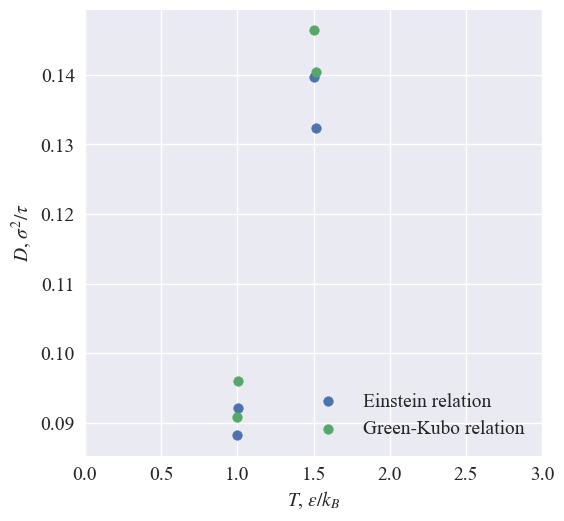

In [15]:
plt.scatter(
    np.array([tp_tuple[0] for tp_tuple in parameters]),
    einstein_diffusion, 
    label='Einstein relation',
);
plt.scatter(
    np.array([tp_tuple[0] for tp_tuple in parameters]),
    green_kubo_diffusion, 
    label='Green-Kubo relation',
); 
plt.xlabel(r'$T$, $\epsilon / k_B$');
plt.ylabel(r'$D$, $\sigma^2 / \tau$');
plt.xlim(
    left=0, 
    right=3,
);
plt.ylim(
#     bottom=0, 
#     top=0.1,
);
plt.legend(markerscale=1);


save_plot(f'diffusion_comparing_{plot_filename_postfix}.png')
plt.show();

#### Извлечение параметров системы из файла

In [16]:
system_parameters = pd.DataFrame()

for parameters_filename in ([
    'system_parameters_2021_04_16_13_51_27.csv',
    'system_parameters_2021_04_16_14_30_43.csv',
    'system_parameters_2021_04_16_15_24_27.csv',
]):
    system_parameters = pd.concat(
        [
            system_parameters, 
            pd.read_csv(os.path.join(PATH_TO_CURRENT_DATA, parameters_filename), sep=';')
        ],
        ignore_index=True
    )
    
for column in system_parameters.columns:
    system_parameters[column] = system_parameters[column].round(5)

system_parameters

,temperature,pressure,kinetic_energy,potential_energy,total_energy,virial,msd,diffusion
0,1.00000,-2.18977,2057.2207,-7379.8687,-5322.6480,-16190.5910,0.0,0.0
1,0.99962,-2.17742,2055.6785,-7377.5400,-5321.8613,-16119.3910,0.0,0.0
2,0.99925,-2.15446,2054.0503,-7373.6387,-5319.5884,-15989.5230,0.0,0.0
3,0.99883,-2.12541,2052.0251,-7367.7120,-5315.6865,-15825.2780,0.0,0.0
4,0.99827,-2.08932,2049.3510,-7359.1396,-5309.7886,-15620.8880,0.0,0.0
...,...,...,...,...,...,...,...,...
29995,1.51947,2.06165,3121.4302,-5526.5590,-2405.1290,5126.7354,0.0,0.0
29996,1.51977,2.05992,3122.3936,-5527.6230,-2405.2295,5115.2730,0.0,0.0
29997,1.52035,2.05838,3123.0881,-5528.4490,-2405.3610,5105.3440,0.0,0.0
29998,1.52035,2.05841,3121.8271,-5527.2140,-2405.3867,5108.0600,0.0,0.0


In [17]:
times = (system_parameters.index + 1) * 0.005

#### Зависимость температуры системы от времени

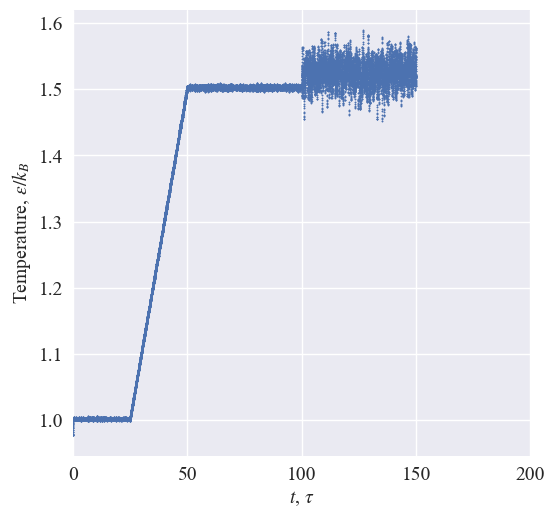

In [18]:
plt.scatter(
    times,
    system_parameters['temperature'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Temperature, $\epsilon / k_B$');

plt.xlim(
    left=0,
    right=200,
);
# plt.ylim(
# #     bottom=2.75,
#     top=3,
# );

save_plot(f'temperature_{plot_filename_postfix}.png')

#### Зависимость давления системы от времени

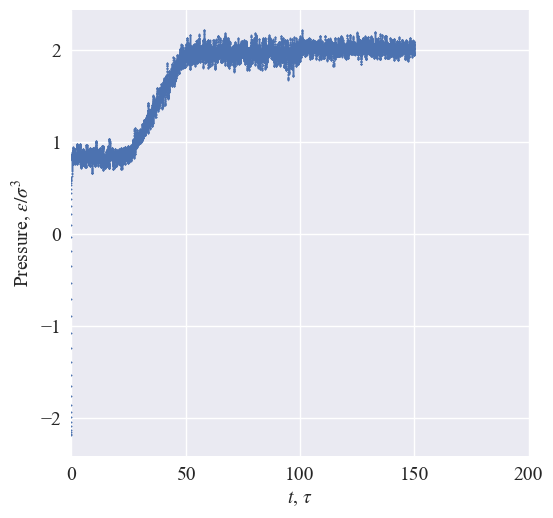

In [19]:
plt.scatter(
    times,
    system_parameters['pressure'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Pressure, $\epsilon / \sigma^3 $');

plt.xlim(
    left=0,
    right=200,
);
# plt.ylim(
#     bottom=-1,
#     top=5,
# );
save_plot(f'pressure_{plot_filename_postfix}.png')

#### Зависимость кинетической энергии системы от времени

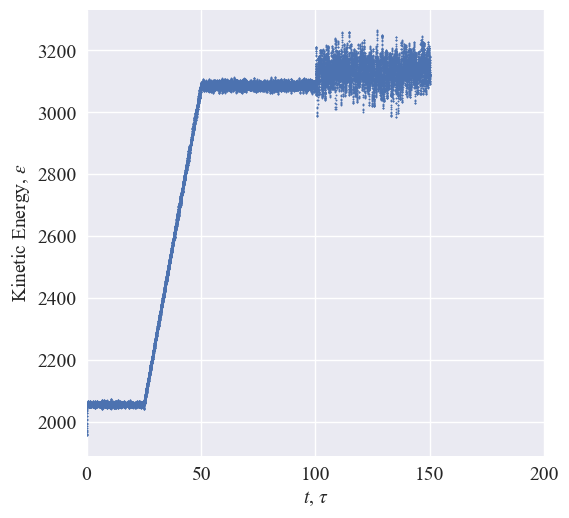

In [20]:
plt.scatter(
    times,
    system_parameters['kinetic_energy'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Kinetic Energy, $\epsilon$');

plt.xlim(
    left=0,
    right=200,
);
# plt.ylim(
# #     bottom=-1,
#     top=6000,
# );
save_plot(f'kinetic_energy_{plot_filename_postfix}.png')

#### Зависимость потенциальной энергии системы от времени

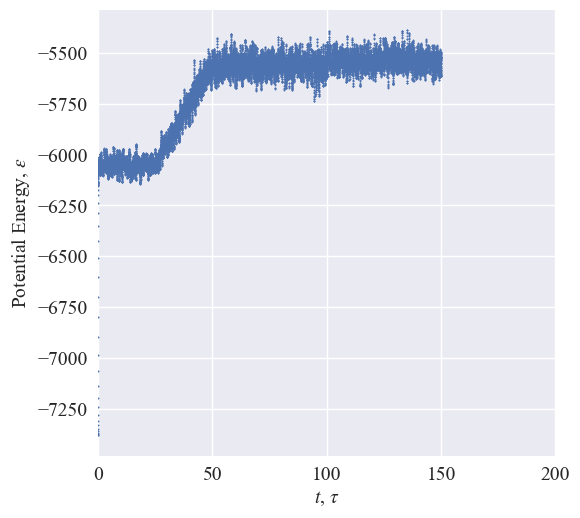

In [21]:
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Potential Energy, $\epsilon$');

plt.xlim(
    left=0,
    right=200,
);
# plt.ylim(
#     bottom=-10000,
#     top=-4000,
# );
save_plot(f'potential_energy_{plot_filename_postfix}.png')

#### Зависимость полной энергии системы от времени

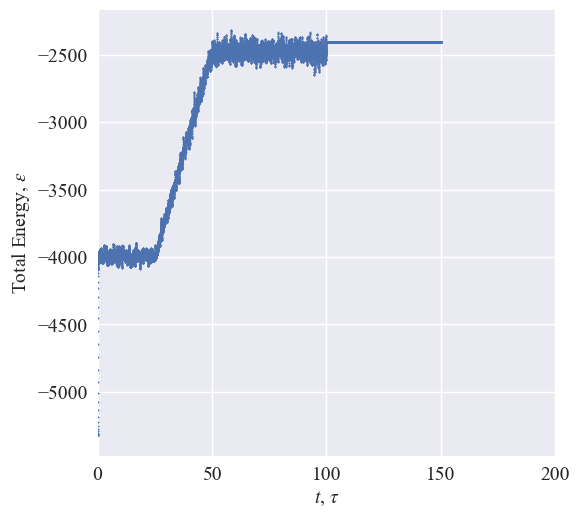

In [22]:
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Total Energy, $\epsilon$');

plt.xlim(
    left=0,
    right=200,
);
# plt.ylim(
#     bottom=-10000,
#     top=2000,
# );
save_plot(f'total_energy_{plot_filename_postfix}.png')

#### Энергии на одном графике

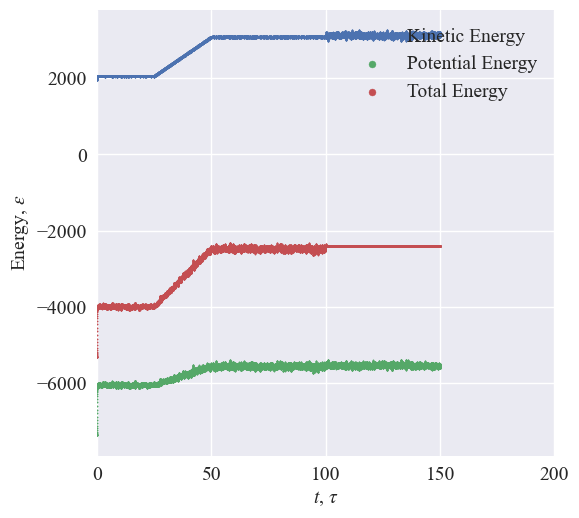

In [23]:
plt.scatter(
    times,
    system_parameters['kinetic_energy'],
    s=1,
    label='Kinetic Energy',
);
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
    label='Potential Energy',
);
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
    label='Total Energy',
);

plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Energy, $\epsilon$');
plt.legend(markerscale=5);

plt.xlim(
    left=0,
    right=200,
);
# plt.ylim(
#     bottom=-10000,
#     top=6000,
# );
save_plot(f'all_energies_{plot_filename_postfix}.png')

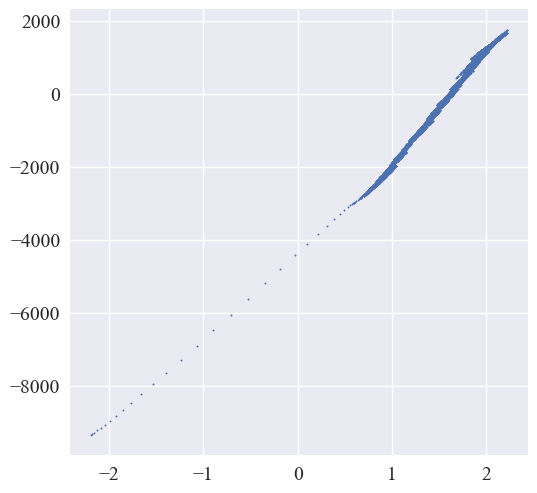

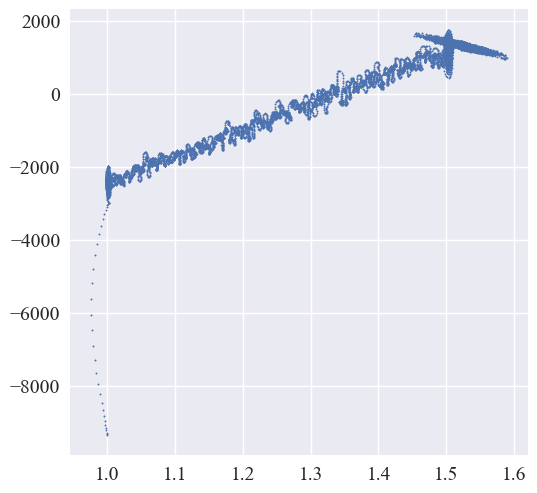

In [25]:
enthalpy = system_parameters['total_energy'] + system_parameters['pressure'] * 12.25 ** 3

plt.scatter(
    system_parameters['pressure'],
    enthalpy,
    s=1,
    label='Enthalpy',
);
plt.show();
plt.scatter(
    system_parameters['temperature'],
    enthalpy,
    s=1,
    label='Enthalpy',
);
plt.show();

In [49]:
system_parameters['total_energy'].values[1:] - system_parameters['total_energy'].values[:-1]

array([ 0.7867,  2.2729,  3.9019, ..., -0.1315, -0.0257,  0.0539])

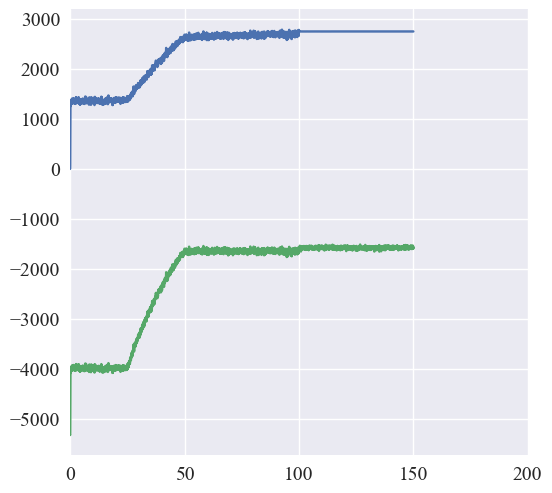

In [60]:
system_parameters.loc[
    1:, 
    'de'
] = system_parameters['total_energy'].values[1:] - system_parameters['total_energy'].values[:-1]
# system_parameters.loc[
#     1:, 
#     'dv'
# ] = system_parameters['cell_volume'].values[1:] - system_parameters['cell_volume'].values[:-1]
system_parameters['ds'] = system_parameters['de'] / system_parameters['temperature']
system_parameters['entropy'] = 0.0
for i in system_parameters.index:
    if i > 0:
        system_parameters.loc[i, 'entropy'] = system_parameters.loc[i - 1, 'entropy']
        system_parameters.loc[i, 'entropy'] += system_parameters.loc[i, 'ds']
# plt.plot(times, system_parameters['ds']);
plt.plot(times, system_parameters['entropy']);
plt.plot(times, system_parameters['total_energy'] / system_parameters['temperature']);
plt.xlim(
    left=0,
    right=200,
);